In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_excel(r"E:\Australia_GDP_Cleaning\Commodities\METAL_PRICES.xlsx", sheet_name='metal_prices_AUD_cleaned', parse_dates=['Date'], index_col='Date')

df.columns = ['Aluminum','Gold','Lead','Nickel','Palladium','Platinum','Silver','Tin','Zinc','Copper','Uranium','Steel Rebar','Cobalt','Iron Ore','Lithium']



In [31]:
df['Aluminum'] = df['Aluminum'].fillna(method='ffill')
df['Gold'] = df['Gold'].fillna(method='ffill')
df['Lead'] = df['Lead'].fillna(method='ffill')
df['Nickel'] = df['Nickel'].fillna(method='ffill')
df['Palladium'] = df['Palladium'].fillna(method='ffill')
df['Platinum'] = df['Platinum'].fillna(method='ffill')
df['Silver'] = df['Silver'].fillna(method='ffill')
df['Tin'] = df['Tin'].fillna(method='ffill')
df['Zinc'] = df['Zinc'].fillna(method='ffill')
df['Copper'] = df['Copper'].fillna(method='ffill')

In [32]:
df

,Aluminum,Gold,Lead,Nickel,Palladium,Platinum,Silver,Tin,Zinc,Copper,Uranium,Steel Rebar,Cobalt,Iron Ore,Lithium
Date,,,,,,,,,,,,,,,
2000-01-03,1.122055,438.516492,0.329837,5.808634,683.994528,674.874601,8.116735,3.978112,0.846329,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,1.116219,430.742211,0.329566,5.746029,687.232743,685.705559,8.097892,3.996946,0.838119,1.279780,NaN,NaN,NaN,NaN,NaN
2000-01-05,1.123500,428.528027,0.326599,5.711378,677.502658,663.831080,8.028255,4.099803,0.830169,1.287407,NaN,NaN,NaN,NaN,NaN
2000-01-06,1.134792,428.932069,0.334149,5.717411,676.254590,650.244798,7.864137,4.129284,0.838739,1.292840,NaN,NaN,NaN,NaN,NaN
2000-01-07,1.141570,430.665852,0.337202,5.653940,670.433720,636.835675,7.842089,4.204795,0.835522,1.291234,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-21,1.909363,4610.070810,1.433832,11.048938,1538.945712,1535.798584,51.817467,24.037766,2.090165,7.136900,101.809599,715.656963,15.381432,168.575925,16.514555
2025-02-24,1.898078,4632.325142,1.420762,11.015911,1502.835539,1526.465028,51.212980,23.753938,2.036704,7.111374,101.921865,716.729679,15.398393,168.856333,16.479206
2025-02-25,1.887908,4638.262652,1.433864,10.967208,1477.218982,1527.668296,50.677913,23.436860,2.008356,7.077093,103.657575,700.394135,15.410531,168.957906,16.478007


In [34]:
print("Missing values in Lithium:", df['Lithium'].isnull().sum())

corr = df.corr()
print("\nCorrelation Matrix:\n", corr['Lithium'].sort_values(ascending=False))

Missing values in Lithium: 4635

Correlation Matrix:
 Lithium        1.000000
Nickel         0.772260
Zinc           0.687495
Aluminum       0.570528
Cobalt         0.478405
Tin            0.386667
Copper         0.382967
Lead           0.367171
Uranium        0.264508
Platinum       0.219041
Steel Rebar    0.200061
Palladium      0.196342
Iron Ore       0.126645
Gold           0.073157
Silver         0.072409
Name: Lithium, dtype: float64


# Linear Regression

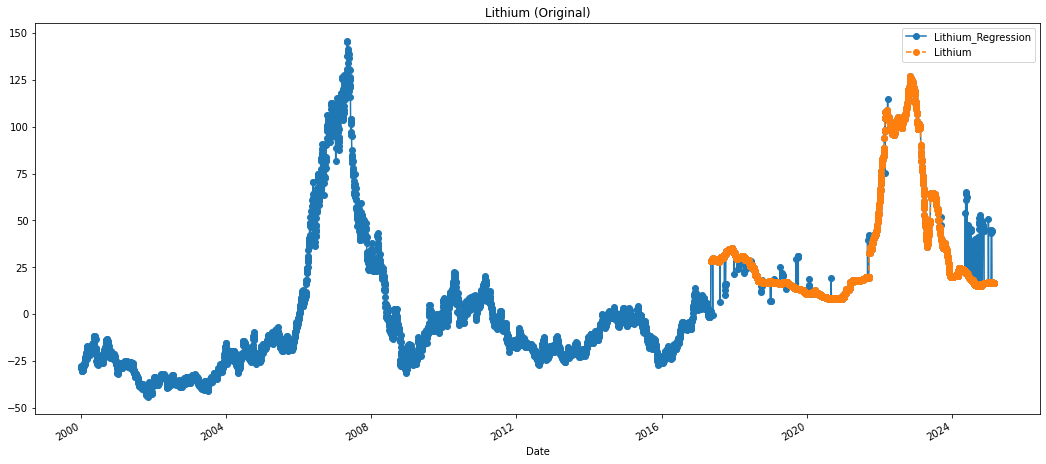

In [54]:
known = df.dropna(subset=['Lithium'])
unknown = df[df['Lithium'].isnull()]

# Features:
features = ['Nickel','Zinc']
X_train = known[features]
y_train = known['Lithium']

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing Coal values
X_pred = unknown[features]
predicted_coal = model.predict(X_pred)

# Fill missing values
df['Lithium_Regression'] = df['Lithium'].copy()
df.loc[df['Lithium'].isnull(), 'Lithium_Regression'] = predicted_coal

plt.figure(figsize=(18, 8))
df['Lithium_Regression'].plot(title='Lithium (Regression Imputed)', marker='o')
df['Lithium'].plot(title='Lithium (Original)', marker='o', linestyle='--')
plt.legend()
plt.show()

# XG Boost

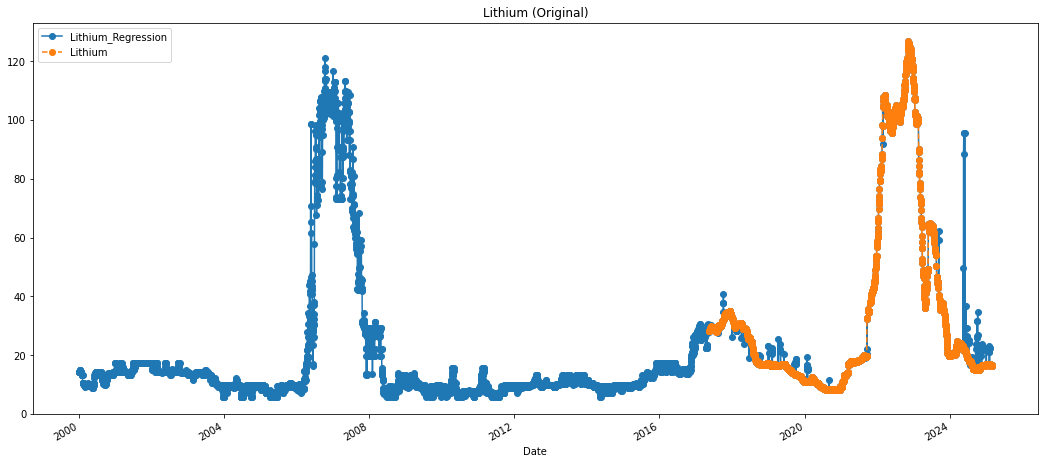

In [53]:

known_data = df.dropna(subset=['Lithium'])
unknown_data = df[df['Lithium'].isnull()] 


features = ['Nickel','Zinc']

X_train = known_data[features]
y_train = known_data['Lithium']

# Train XGBoost model
model = xgb.XGBRegressor(objective='reg:tweedie', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=1000)
model.fit(X_train, y_train)

X_pred = unknown_data[features]
predicted_prices = model.predict(X_pred)

# Fill missing values in the dataframe
df['Lithium_Regression'] = df['Lithium'].copy()
df.loc[df['Lithium'].isnull(), 'Lithium_Regression'] = predicted_prices

import matplotlib.pyplot as plt
plt.figure(figsize=(18, 8))
df['Lithium_Regression'].plot(title='Lithium (Regression Imputed)', marker='o')
df['Lithium'].plot(title='Lithium (Original)', marker='o', linestyle='--')
plt.legend()
plt.show()


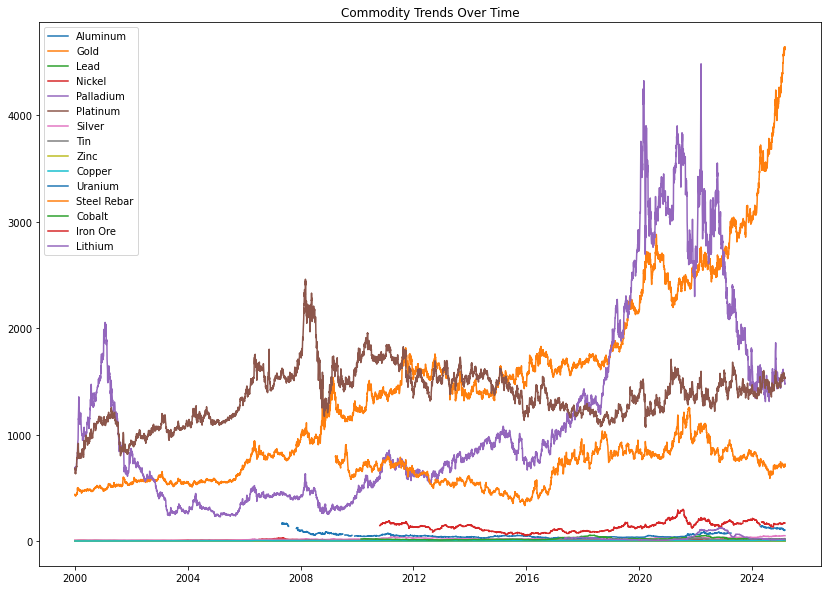

In [38]:
plt.figure(figsize=(14, 10))
for column in df.columns[:-1]:  # Exclude interpolated/regression columns
    plt.plot(df.index, df[column], label=column)
plt.title('Commodity Trends Over Time')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

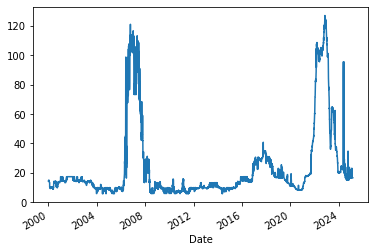

In [40]:
df['Lithium_Regression'].plot()

<Axes: xlabel='Date'>

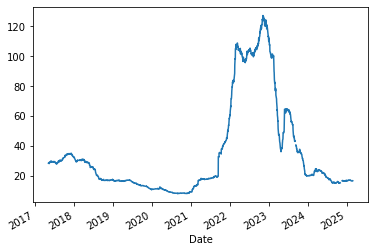

In [41]:
df['Lithium'].plot()

# IDENTIFY SPIKES

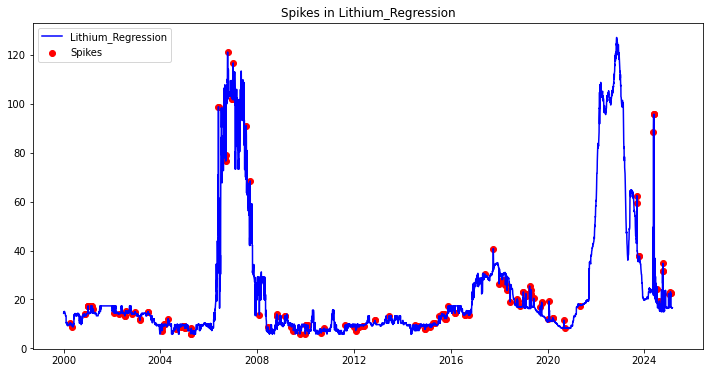

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


window = 30  # adjust
rolling_mean = df['Lithium_Regression'].rolling(window=window, center=True).mean()
rolling_std = df['Lithium_Regression'].rolling(window=window, center=True).std()
threshold = 2

df['Is_Spike'] = np.abs(df['Lithium_Regression'] - rolling_mean) > (threshold * rolling_std)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Lithium_Regression'], label='Lithium_Regression', color='blue')
plt.scatter(df.index[df['Is_Spike']], df['Lithium_Regression'][df['Is_Spike']], color='red', label='Spikes')
plt.title('Spikes in Lithium_Regression')
plt.legend()
plt.show()

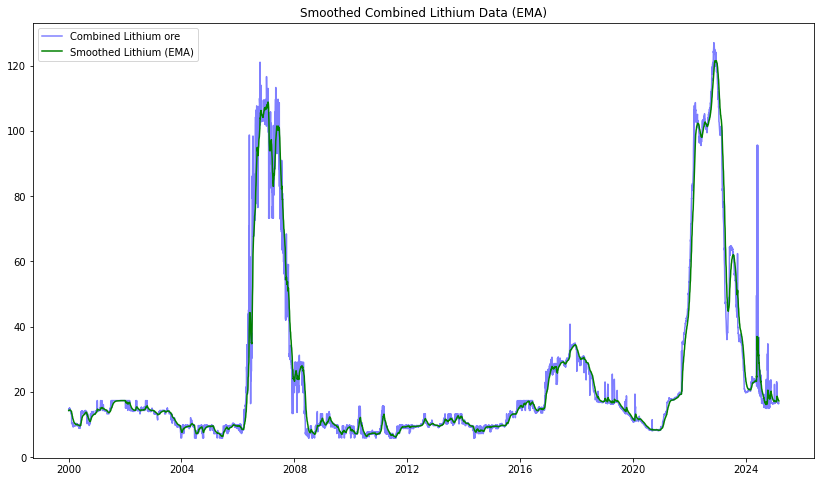

In [46]:
df['Lithium_smooth'] = df['Lithium_Regression'].ewm(span=30, adjust=False).mean()

plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Lithium_Regression'], label='Combined Lithium ore', color='blue', alpha=0.5)
plt.plot(df.index, df['Lithium_smooth'], label='Smoothed Lithium (EMA)', color='green')
plt.title('Smoothed Combined Lithium Data (EMA)')
plt.legend()
plt.show()

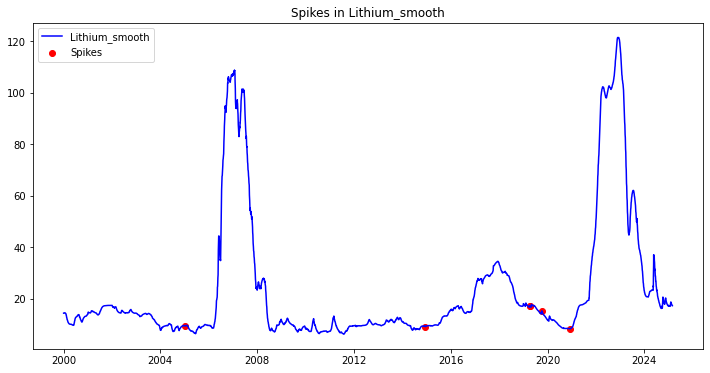

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

window = 30 
rolling_mean = df['Lithium_smooth'].rolling(window=window, center=True).mean()
rolling_std = df['Lithium_smooth'].rolling(window=window, center=True).std()

threshold = 2 
df['Is_Spike'] = np.abs(df['Lithium_smooth'] - rolling_mean) > (threshold * rolling_std)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Lithium_smooth'], label='Lithium_smooth', color='blue')
plt.scatter(df.index[df['Is_Spike']], df['Lithium_smooth'][df['Is_Spike']], color='red', label='Spikes')
plt.title('Spikes in Lithium_smooth')
plt.legend()
plt.show()

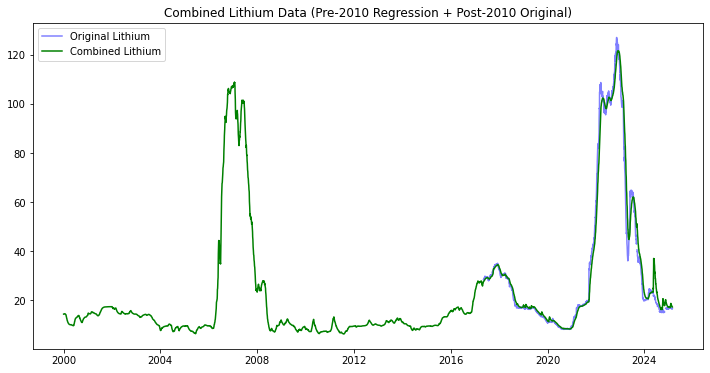

In [49]:
df['Lithium_Combined'] = df['Lithium'].copy()  # Start with original data
df.loc[df.index < '2017-05-09', 'Lithium_Combined'] = df['Lithium_smooth']  # Use regression for pre-2010

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Lithium'], label='Original Lithium', color='blue', alpha=0.5)
plt.plot(df.index, df['Lithium_smooth'], label='Combined Lithium', color='green')
plt.title('Combined Lithium Data (Pre-2010 Regression + Post-2010 Original)')
plt.legend()
plt.show()

In [50]:
df

,Aluminum,Gold,Lead,Nickel,Palladium,Platinum,Silver,Tin,Zinc,Copper,Uranium,Steel Rebar,Cobalt,Iron Ore,Lithium,Lithium_Regression,Is_Spike,Lithium_smooth,Lithium_Combined
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,1.122055,438.516492,0.329837,5.808634,683.994528,674.874601,8.116735,3.978112,0.846329,NaN,NaN,NaN,NaN,NaN,NaN,14.349607,False,14.349607,14.349607
2000-01-04,1.116219,430.742211,0.329566,5.746029,687.232743,685.705559,8.097892,3.996946,0.838119,1.279780,NaN,NaN,NaN,NaN,NaN,14.349607,False,14.349607,14.349607
2000-01-05,1.123500,428.528027,0.326599,5.711378,677.502658,663.831080,8.028255,4.099803,0.830169,1.287407,NaN,NaN,NaN,NaN,NaN,14.372057,False,14.351055,14.351055
2000-01-06,1.134792,428.932069,0.334149,5.717411,676.254590,650.244798,7.864137,4.129284,0.838739,1.292840,NaN,NaN,NaN,NaN,NaN,14.372057,False,14.352410,14.352410
2000-01-07,1.141570,430.665852,0.337202,5.653940,670.433720,636.835675,7.842089,4.204795,0.835522,1.291234,NaN,NaN,NaN,NaN,NaN,14.372057,False,14.353677,14.353677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-21,1.909363,4610.070810,1.433832,11.048938,1538.945712,1535.798584,51.817467,24.037766,2.090165,7.136900,101.809599,715.656963,15.381432,168.575925,16.514555,16.514555,False,17.497280,16.514555
2025-02-24,1.898078,4632.325142,1.420762,11.015911,1502.835539,1526.465028,51.212980,23.753938,2.036704,7.111374,101.921865,716.729679,15.398393,168.856333,16.479206,16.479206,False,17.431598,16.479206
2025-02-25,1.887908,4638.262652,1.433864,10.967208,1477.218982,1527.668296,50.677913,23.436860,2.008356,7.077093,103.657575,700.394135,15.410531,168.957906,16.478007,16.478007,False,17.370076,16.478007


In [51]:
df.to_excel(r"E:\Australia_GDP_Cleaning\Commodities\METAL_PRICES_Interpolated.xlsx", index=False)